# TP3 Alejandro balladares 101118

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") 

pd.options.display.float_format = '{:20,.2f}'.format 

import warnings
warnings.filterwarnings('ignore')


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Parte I: Análisis exploratorio (6 puntos)

Realizar 6 visualizaciones interesantes que ayuden a explicar el target, que contengan al
menos un feature de train_identity.csv y haciendo al menos un plot de cada tipo:

  ● Bar plot
  ● Violin plot
  ● Box plot
  ● Heatmap


In [4]:
#1Jd247D2BPj4ry7kpzK71fMtnyzOYa9M_
id_train_identity = '1Jd247D2BPj4ry7kpzK71fMtnyzOYa9M_'
downloaded = drive.CreateFile({'id': id_train_identity})
downloaded.GetContentFile('train_identity.csv')

df_train_identity = pd.read_csv('train_identity.csv')
#df_train_identity.head().T

In [5]:
#"1ToBfhZrshAHYsrW3FXVPxuPT-Vm5-8NB"

id_train_transaction = '1ToBfhZrshAHYsrW3FXVPxuPT-Vm5-8NB'
downloaded = drive.CreateFile({'id': id_train_transaction})
downloaded.GetContentFile('train_transaction.csv')

df_train_transaction = pd.read_csv('train_transaction.csv')
#df_train_transaction.head().T

In [6]:
df_train = pd.merge(df_train_identity, df_train_transaction, how='outer',on='TransactionID')
del df_train_identity
del df_train_transaction

# Pie plot

In [7]:
df_train['DeviceType'].value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

In [8]:
df_fraude = df_train[['DeviceType', 'isFraud']]
df_fraude = df_fraude.loc[df_fraude.isFraud == 1]
#df_fraude

In [9]:
df_plot = df_fraude

desktop = df_plot[df_plot['DeviceType'] == 'desktop']
mobile = df_plot[df_plot['DeviceType'] == 'mobile']

cant_desktop = desktop['DeviceType'].count()
cant_mobile = mobile['DeviceType'].count()

<Figure size 360x360 with 0 Axes>

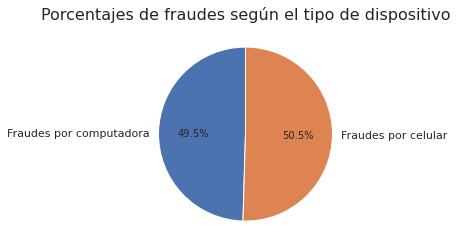

In [10]:

plt.figure(figsize=(5,5))
fig1, ax1 = plt.subplots()
ax1.pie([cant_desktop, cant_mobile], labels=['Fraudes por computadora', 'Fraudes por celular'], autopct='%1.1f%%', startangle=90)
plt.title("Porcentajes de fraudes según el tipo de dispositivo", fontsize=16)
plt.show()

# HeatMap

Text(30.5, 0.5, 'Valor id_15')

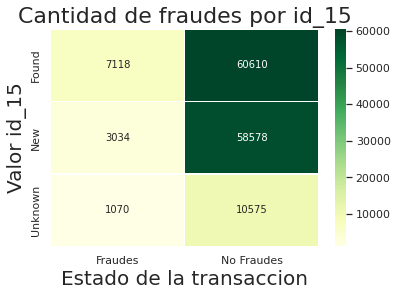

In [11]:

#id_15
df_id_15 = df_train[['id_15','isFraud']]

df_plot_HM_id_15 = df_id_15
df_plot_HM_id_15 = df_plot_HM_id_15.groupby(['id_15'])['isFraud'].agg(['sum','count'])
df_plot_HM_id_15.columns= ['Fraudes', 'No Fraudes']
df_plot_HM_id_15 = df_plot_HM_id_15.reset_index()
df_plot_HM_id_15['No Fraudes'] = df_plot_HM_id_15['No Fraudes'] - df_plot_HM_id_15['Fraudes']
df_plot_HM_id_15 = df_plot_HM_id_15.set_index('id_15')
df_plot_HM_id_15


g = sns.heatmap(df_plot_HM_id_15, linewidths=.5, cmap="YlGn", annot=True, fmt="d")
g.set_title("Cantidad de fraudes por id_15", fontsize=22)
g.set_xlabel("Estado de la transaccion",fontsize=20)
g.set_ylabel("Valor id_15", fontsize=20)

El siguiente heatmap no utiliza al menos una categoria de train_identity.csv por lo que no sería válido pero lo dejo igual.

In [12]:
df_card = df_train[['card1','card2','card3','card4','card5','card6', 'isFraud']]
#df_card

In [13]:
df_plot_HM_credit = df_card.loc[df_card.card6 == 'credit']
df_plot_HM_credit = df_plot_HM_credit.groupby(['card4'])['isFraud'].agg({'sum','count'})
df_plot_HM_credit.columns= ['Fraudes credito', 'No Fraudes credito']
df_plot_HM_credit = df_plot_HM_credit.reset_index()
df_plot_HM_credit['No Fraudes credito'] = df_plot_HM_credit['No Fraudes credito'] - df_plot_HM_credit['Fraudes credito']
df_plot_HM_credit = df_plot_HM_credit.set_index('card4')
#df_plot_HM_credit

In [14]:
df_plot_HM_debit = df_card.loc[df_card.card6 == 'debit']
df_plot_HM_debit = df_plot_HM_debit.groupby(['card4'])['isFraud'].agg({'sum','count'})
df_plot_HM_debit.columns= ['Fraudes debito', 'No Fraudes debito']
df_plot_HM_debit = df_plot_HM_debit.reset_index()
df_plot_HM_debit['No Fraudes debito'] = df_plot_HM_debit['No Fraudes debito'] - df_plot_HM_debit['Fraudes debito']
df_plot_HM_debit = df_plot_HM_debit.set_index('card4')
#df_plot_HM_debit

In [15]:
df_plot_HM_credit = df_plot_HM_credit.reset_index()
df_plot_HM_debit = df_plot_HM_debit.reset_index()

Text(30.499999999999993, 0.5, 'Tajeta')

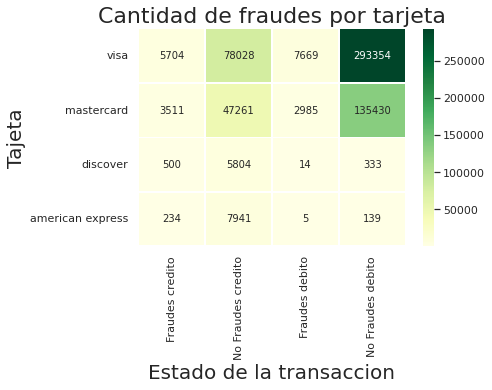

In [16]:
df_plot_HM = pd.merge(df_plot_HM_credit, df_plot_HM_debit, on= 'card4', how='outer')
df_plot_HM = df_plot_HM.set_index('card4')
df_plot_HM = df_plot_HM.sort_index(ascending=False)
df_plot_HM

g = sns.heatmap(df_plot_HM, linewidths=.5, cmap="YlGn", annot=True, fmt="d")
g.set_title("Cantidad de fraudes por tarjeta", fontsize=22)
g.set_xlabel("Estado de la transaccion",fontsize=20)
g.set_ylabel("Tajeta", fontsize=20)

# Bar plot

In [17]:
#'id_31'

df_barplot = df_train[['id_31','TransactionAmt','isFraud']]
df_barplot

df_barplot = df_barplot.groupby(['id_31','isFraud'])['TransactionAmt'].agg(['count','mean'])
df_barplot.columns = ['cantidad','promedio']
df_barplot = df_barplot.reset_index()

df_barplot = df_barplot.loc[df_barplot['cantidad'] > 1000]

df_barplot = df_barplot.pivot(index='id_31', columns='isFraud',values='promedio').fillna(value=0)
#df_barplot.columns = ['No Fraude', 'Fraude']
df_barplot

isFraud,0,1
id_31,,
chrome 62.0,86.84,0.00
chrome 62.0 for android,51.78,0.00
chrome 63.0,90.09,67.92
chrome 63.0 for android,54.43,0.00
chrome 64.0,68.27,0.00
chrome 64.0 for android,38.11,0.00
chrome 65.0,72.62,0.00
chrome 65.0 for android,43.06,0.00
chrome 66.0,74.38,0.00


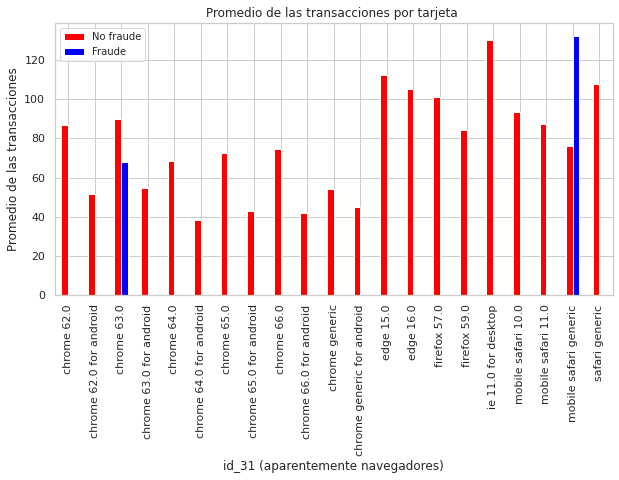

In [18]:
colores = ['red', 'blue']

df_barplot.plot(kind = 'bar', color=colores, figsize = (10, 5),  title = "Promedio de las transacciones por tarjeta ")
plt.xlabel('id_31 (aparentemente navegadores)', fontsize= 12)
plt.ylabel("Promedio de las transacciones", fontsize= 12)
plt.legend(["No fraude", "Fraude"],fontsize=10)


El siguiente barplot no utiliza columnas de train_identity.csv por lo que no sería válido pero lo dejo igual.

In [19]:
df_plot_bar = df_train.groupby(['card6','isFraud'])['TransactionAmt'].agg({'mean'})
df_plot_bar.columns =['cantidad']
df_plot_bar = df_plot_bar.reset_index()
df_plot_bar = df_plot_bar.pivot(index='card6', columns='isFraud',values='cantidad').fillna(value=0)
df_plot_bar.columns = ['Fraude', 'No fraude']
df_plot_bar = df_plot_bar
df_plot_bar

,Fraude,No fraude
card6,,
charge card,59.53,0.00
credit,191.72,166.51
debit,115.91,133.22
debit or credit,104.07,0.00


Text(0, 0.5, 'Promedio de las transacciones')

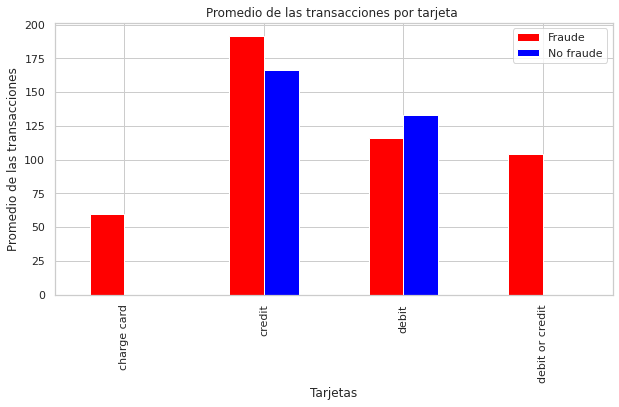

In [20]:
colores = ['red', 'blue']

df_plot_bar.plot(kind = 'bar', color=colores, figsize = (10, 5),  title = "Promedio de las transacciones por tarjeta ")
plt.xlabel('Tarjetas', fontsize= 12)
plt.ylabel("Promedio de las transacciones", fontsize= 12)


# Box plot

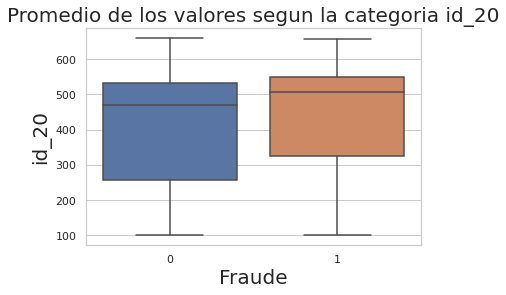

In [21]:
df_id_20_box_plot = df_train.copy()
fig, axes = plt.subplots()

ax = sns.boxplot(x="isFraud", y='id_20', data=df_id_20_box_plot,  orient="v")#, palette = colores)

axes.set_title('Promedio de los valores segun la categoria id_20', fontsize = 20)
axes.set_xlabel('Fraude', fontsize = 20)
axes.set_ylabel('id_20', fontsize = 20)

plt.show()

# Violin plot

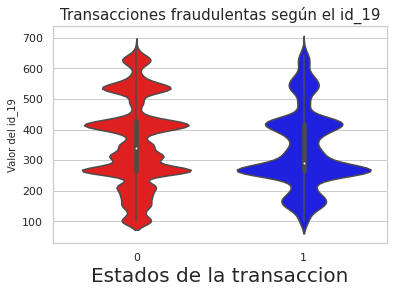

In [22]:
df_plot_tiempo = df_train.copy()

colors_list = ['#FF0000', '#0000FF']
fig, axes = plt.subplots()

sns.violinplot('isFraud','id_19', data=df_plot_tiempo, ax = axes, palette=colors_list)#, hue='Stage')

axes.set_title('Transacciones fraudulentas según el id_19',fontsize=15)
axes.set_xlabel('Estados de la transaccion', fontsize=20)
axes.set_ylabel('Valor del id_19',fontsize=10)

plt.show()
#id_19

El siguiente violin plot no utiliza al menos una categoria de train_identity.csv por lo que no sería válido pero lo dejo igual.

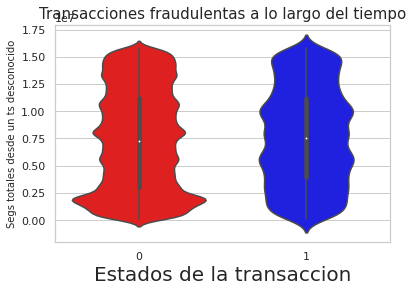

In [23]:
df_plot_tiempo = df_train.loc[df_train.TransactionDT > 500]

colors_list = ['#FF0000', '#0000FF']
fig, axes = plt.subplots()

sns.violinplot('isFraud','TransactionDT', data=df_plot_tiempo, ax = axes, palette=colors_list)#, hue='Stage')

axes.set_title('Transacciones fraudulentas a lo largo del tiempo',fontsize=15)
axes.set_xlabel('Estados de la transaccion', fontsize=20)
axes.set_ylabel('Segs totales desde un ts desconocido',fontsize=10)

plt.show()
#id_19

# Line plot

In [24]:
df_plot_line = df_train.copy()
df_plot_line['TransactionDT'] = df_plot_line['TransactionDT'].transform(lambda x: np.round(np.log(x),2))
df_plot_line = df_plot_line.groupby(['TransactionDT','isFraud']).agg({'id_02':'mean'})
df_plot_line = df_plot_line.reset_index()

df_plot_line_filtrado = df_plot_line.loc[(df_plot_line.TransactionDT > 0) & (df_plot_line.TransactionDT < 13.0)]

df_plot_line_filtrado = df_plot_line_filtrado.pivot(index='TransactionDT', columns='isFraud', values='id_02')
df_plot_line = df_plot_line.pivot(index='TransactionDT', columns='isFraud', values='id_02')

df_plot_line.fillna(value=0, inplace=True)
df_plot_line_filtrado.fillna(value=0, inplace=True)

#df_plot_line_filtrado

In [25]:
#df_plot_line.head(5)

Text(0.5, 1.0, 'Promedio de id_02 segun el transactionDT (filtrado)')

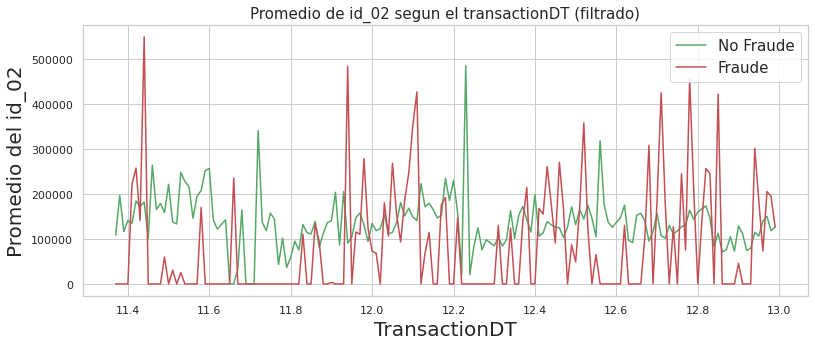

In [26]:
index = df_plot_line_filtrado.index.tolist()
plt.figure(figsize=(13,5))
plt.plot(index, df_plot_line_filtrado[[0]], color='g')
plt.plot(index, df_plot_line_filtrado[[1]], color='r')

plt.xlabel('TransactionDT',fontsize=20)
plt.ylabel('Promedio del id_02',fontsize=20)
plt.legend(["No Fraude","Fraude"],fontsize=15)
plt.title("Promedio de id_02 segun el transactionDT (filtrado)", fontsize=15)

Text(0.5, 1.0, 'Promedio de id_02 segun el transactionDT (sin filtrar)')

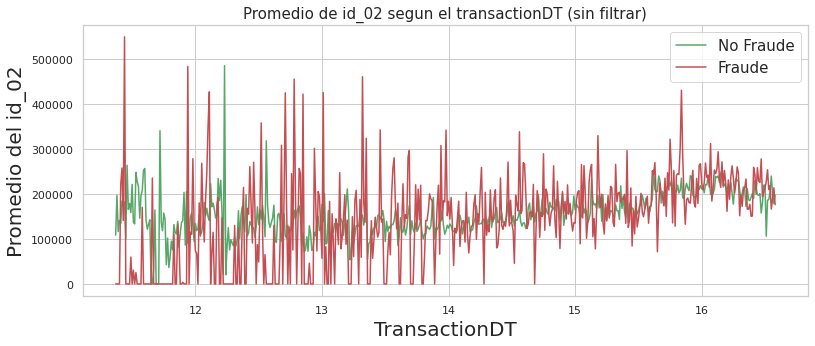

In [27]:
index = df_plot_line.index.tolist()
fig = plt.figure(figsize=(13,5))
plt.plot(index, df_plot_line[[0]], color='g')
plt.plot(index, df_plot_line[[1]], color='r')
plt.xlabel('TransactionDT',fontsize=20)
plt.ylabel('Promedio del id_02',fontsize=20)
   
plt.legend(["No Fraude","Fraude"],fontsize=15)
plt.title("Promedio de id_02 segun el transactionDT (sin filtrar)", fontsize=15)